<a href="https://colab.research.google.com/github/jguenther504/Jim-Guenther/blob/Mariposa/Datawrangling_SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The spectra were vetted using a peak threshold and signal-to-noise ratio (SNR) algorithms developed in
previous projects for Mariposa Technology. The peak threshold algorithm measured absolute peak
heights at 1526. 1325, 1156, and 747 cm-1 as these represent the four biggest peaks in the spectra
received. A threshold of 100 counts was used, where if for any spectrum one of these peaks was less
than 100 counts the entire spectrum was rejected. The SNR for each spectrum was calculated by
measuring the peak-to-peak noise between 2000 and 1800 cm-1, and the signal was measured as the
absolute height at 1526, which was typically the biggest peak in each spectrum.

In [1]:
import pandas as pd
import numpy as np
!pip install scipy
from scipy.signal import find_peaks



In [2]:
#Load data set
rs_data= ('/content/drive/MyDrive/Test SNR threshold/Test samples.xlsx')
df = pd.read_excel(rs_data)
df
dfextract= df.iloc[0,1:]


In [3]:
#define snr code
import numpy as np
import statistics


m = statistics.mean(dfextract)
sd = statistics.stdev(dfextract)



In [4]:
#calculate SNR from rs_data
rs_snr= m/sd
#rs_snr = signaltonoise(dfextract, axis=0, ddof=0)
rs_snr= rs_snr*100
print(m)
print(sd)
print(rs_snr)

370.9897625681405
742.6505290258118
49.954823711604234


In [5]:
# Singal to Noise Ratio
#enter the desired SNR threshold
snrt = input('Enter the SNR threshold ')
snrt= float(snrt)
snrt

Enter the SNR threshold 30


30.0

In [6]:
#check if snr is => snrt

if snrt <= rs_snr:
  print("RS Passed SNR threshold")
else:
  print("RS FAILED SNR Threshold")

RS Passed SNR threshold


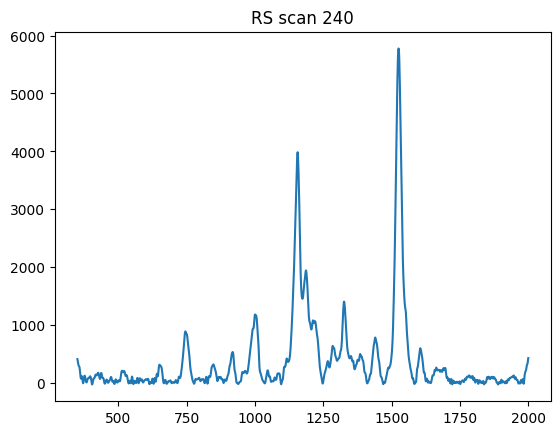

In [7]:
from pandas.core.indexes.api import Index
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
#peak selection
peaks= find_peaks(dfextract)
scannumber=df.iloc[0,0]
scannumber=str(scannumber)
xaxis= df.iloc[0,0:]
plot = dfextract.plot(title="RS scan "+scannumber)
default_x_ticks = range(len(df.iloc[0:,0]))
#find peaks



In [8]:
#find peaks
# positions 1526. 1325, 1156, and 747 cm-1
p1= dfextract.loc[1526]
p1=float(p1)
p2= dfextract.loc[1325]
p2=float(p2)
p3= dfextract.loc[1156]
p3=float(p3)
p4= dfextract.loc[747]
p4=float(p4)

# set peak threshold
pthreshold = input('Enter the minimum peak threshold counts ')
pthreshold= float(pthreshold)
#pass fail arguements for peak height
if p1 >= pthreshold:
  print("RS Passed peak 1 1526 cm-1 threshold")
else:
  print("RS FAILED peak 1 1526 cm-1 threshold")

if p2 >= pthreshold:
  print("RS Passed peak 2 1325 cm-1 threshold")
else:
  print("RS FAILED peak 2 1325 cm-1 threshold")

if p3 >= pthreshold:
  print("RS Passed peak 3 1156 cm-1 threshold")
else:
  print("RS FAILED peak 3 1156 cm-1 threshold")

if p4 >= pthreshold:
  print("RS Passed peak 4 747 cm-1 threshold")
else:
  print("RS FAILED peak 4 747 cm-1 threshold")

#maxpeak= max(dfextract)
#print(dfextract)
#maxpeak
#ind= dfextract.index
#ind
#
#indx

Enter the minimum peak threshold counts 100
RS Passed peak 1 1526 cm-1 threshold
RS Passed peak 2 1325 cm-1 threshold
RS Passed peak 3 1156 cm-1 threshold
RS Passed peak 4 747 cm-1 threshold


In [10]:
#Final pass fail
if ((snrt <= rs_snr) and (p1 >= pthreshold) and (p2 >= pthreshold) and (p3 >= pthreshold) and (p4 >= pthreshold)):
    print("PASS")
else:
    print("FAIL")

PASS
